In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import RobustScaler

from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski, Crippen, MolSurf, Fragments
from rdkit.Chem.EState import EState_VSA
from rdkit.Chem.GraphDescriptors import (
    BalabanJ, BertzCT, Chi0, Chi0n, Chi0v, Chi1, Chi1n, Chi1v, Chi2n, Chi2v, Chi3n, Chi3v, Chi4n, Chi4v, HallKierAlpha, Ipc, Kappa1, Kappa2, Kappa3
)
from rdkit.Chem.EState.EState_VSA import (EState_VSA1, EState_VSA10, EState_VSA11, EState_VSA2, EState_VSA3,
    EState_VSA4, EState_VSA5, EState_VSA6, EState_VSA7, EState_VSA8, EState_VSA9, VSA_EState1, VSA_EState10,
    VSA_EState2, VSA_EState3, VSA_EState4, VSA_EState5, VSA_EState6, VSA_EState7, VSA_EState8, VSA_EState9
)
from rdkit.Chem.Descriptors import (ExactMolWt, MolWt, HeavyAtomMolWt, MaxAbsPartialCharge, MinPartialCharge,
    MaxPartialCharge, MinAbsPartialCharge, NumRadicalElectrons, NumValenceElectrons
)
from rdkit.Chem.EState.EState import MaxAbsEStateIndex, MaxEStateIndex, MinAbsEStateIndex, MinEStateIndex
from rdkit.Chem.Lipinski import (
    FractionCSP3, HeavyAtomCount, NHOHCount, NOCount, NumAliphaticCarbocycles, NumAliphaticHeterocycles, NumAliphaticRings,
    NumAromaticCarbocycles, NumAromaticHeterocycles, NumAromaticRings, NumHAcceptors, NumHDonors, NumHeteroatoms, RingCount,
    NumRotatableBonds, NumSaturatedCarbocycles, NumSaturatedHeterocycles, NumSaturatedRings
)
from rdkit.Chem.Crippen import MolLogP, MolMR
from rdkit.Chem.MolSurf import (
    LabuteASA, PEOE_VSA1, PEOE_VSA10, PEOE_VSA11, PEOE_VSA12, PEOE_VSA13, PEOE_VSA14, PEOE_VSA2, PEOE_VSA3, PEOE_VSA4, PEOE_VSA5,
    PEOE_VSA6, PEOE_VSA7, PEOE_VSA8, PEOE_VSA9, SMR_VSA1, SMR_VSA10, SMR_VSA2, SMR_VSA3, SMR_VSA4, SMR_VSA5, SMR_VSA6, SMR_VSA7,
    SMR_VSA8, SMR_VSA9, SlogP_VSA1, SlogP_VSA10, SlogP_VSA11, SlogP_VSA12, SlogP_VSA2, SlogP_VSA3, SlogP_VSA4, SlogP_VSA5,
    SlogP_VSA6, SlogP_VSA7, SlogP_VSA8, SlogP_VSA9, TPSA
)
from rdkit.Chem.Fragments import (
    fr_Al_COO, fr_Al_OH, fr_Al_OH_noTert, fr_ArN, fr_Ar_COO, fr_Ar_N, fr_Ar_NH, fr_Ar_OH, fr_COO, fr_COO2, fr_C_O, fr_C_O_noCOO,
    fr_C_S, fr_HOCCN, fr_Imine, fr_NH0, fr_NH1, fr_NH2, fr_N_O, fr_Ndealkylation1, fr_Ndealkylation2, fr_Nhpyrrole, fr_SH,
    fr_aldehyde, fr_alkyl_carbamate, fr_alkyl_halide, fr_allylic_oxid, fr_amide, fr_amidine, fr_aniline, fr_aryl_methyl,
    fr_azide, fr_azo, fr_barbitur, fr_benzene, fr_benzodiazepine, fr_bicyclic, fr_diazo, fr_dihydropyridine, fr_epoxide,
    fr_ester, fr_ether, fr_furan, fr_guanido, fr_halogen, fr_hdrzine, fr_hdrzone, fr_imidazole, fr_imide, fr_isocyan,
    fr_isothiocyan, fr_ketone, fr_ketone_Topliss, fr_lactam, fr_lactone, fr_methoxy, fr_morpholine, fr_nitrile, fr_nitro,
    fr_nitro_arom, fr_nitro_arom_nonortho, fr_nitroso, fr_oxazole, fr_oxime, fr_para_hydroxylation, fr_phenol,
    fr_phenol_noOrthoHbond, fr_phos_acid, fr_phos_ester, fr_piperdine, fr_piperzine, fr_priamide, fr_prisulfonamd,
    fr_pyridine, fr_quatN, fr_sulfide, fr_sulfonamd, fr_sulfone, fr_term_acetylene, fr_tetrazole, fr_thiazole, fr_thiocyan,
    fr_thiophene, fr_unbrch_alkane, fr_urea
)


In [2]:
# config
z_threshold = 10
relation = 0.1
scaler = RobustScaler()

In [11]:
train = pd.read_csv('./Data/train_final.csv')
test = pd.read_csv('./Data/test_final.csv')

In [13]:
# 이상치 처리
z_scores = stats.zscore(train.iloc[:, 4:])

outliers = train[(abs(z_scores) > z_threshold).any(axis=1)]
outliers

train.drop(outliers.index, inplace=True)

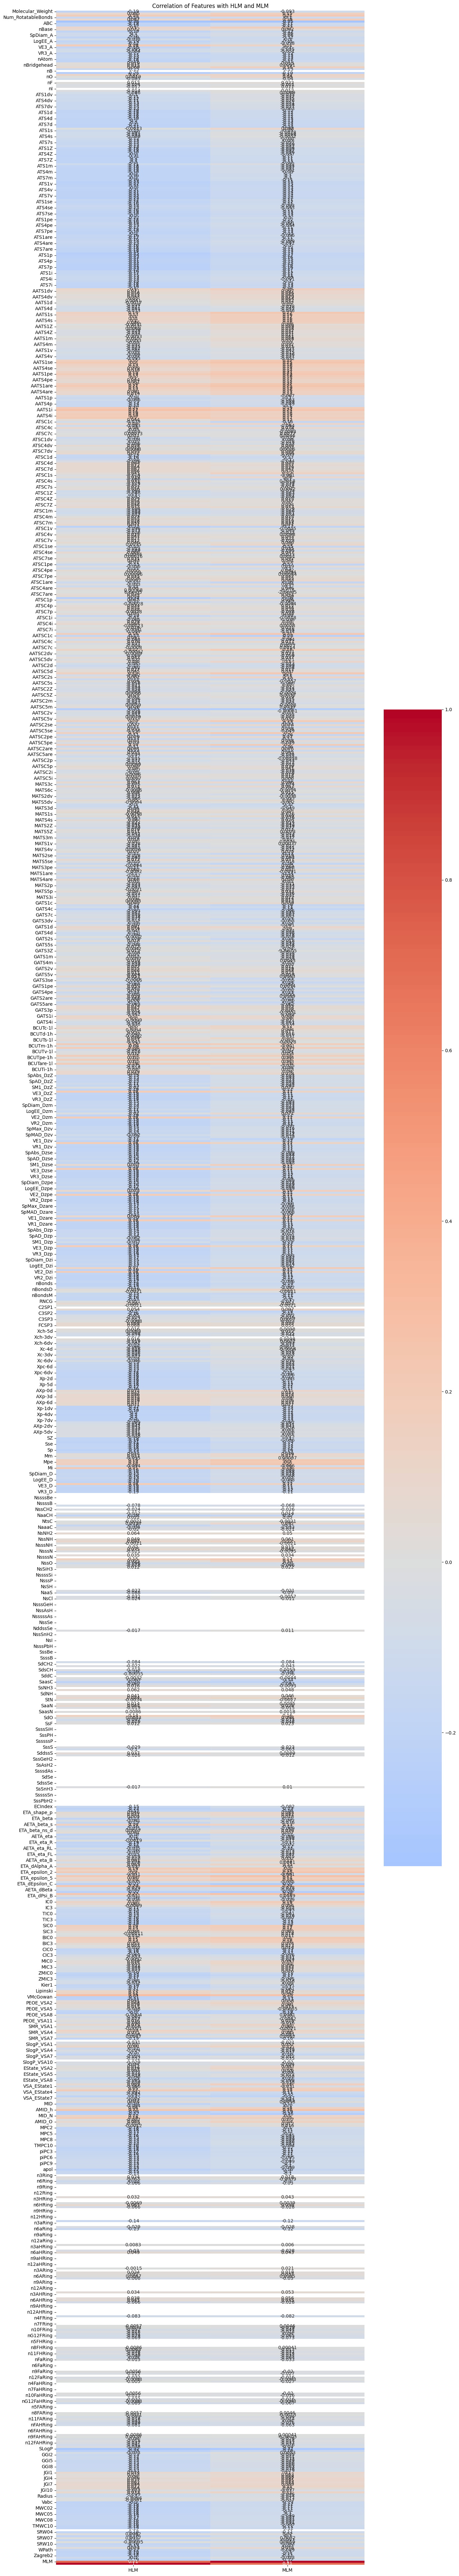

In [15]:
train_drop_odj = train

correlation_matrix = train_drop_odj.corr()

In [24]:
# 둘다 relation 넘는 feature 모음 / 86 columns
filtered_features_00 = train_drop_odj.columns[(abs(correlation_matrix['HLM']) >= relation) & (abs(correlation_matrix['MLM']) >= relation)]

train_drop_feature_00 = train[list(filtered_features_00)]
train_drop_feature_00.to_csv('./Data/eda/h&m_and.csv', index=False)

test_drop_feature_00 = test[list(filtered_features_00)[:-2]]
test_drop_feature_00.to_csv('./Data/eda/h&m_and_test.csv', index=False)

# 하나라도 relation 넘는 feature 모음 / 114 columns
filtered_features_01 = train_drop_odj.columns[(abs(correlation_matrix['HLM']) >= relation) | (abs(correlation_matrix['MLM']) >= relation)]

train_drop_feature_01 = train[list(filtered_features_01)]
train_drop_feature_01.to_csv('./Data/eda/h&m_or.csv', index=False)

test_drop_feature_01 = test[list(filtered_features_01)[:-2]]
test_drop_feature_01.to_csv('./Data/eda/h&m_or_test.csv', index=False)

# mlm 만 구할때 / 98 columns
filtered_features_02 = train_drop_odj.columns[(abs(correlation_matrix['MLM']) >= relation)]

train_drop_feature_02 = train[list(filtered_features_02)].drop('HLM', axis=1)
train_drop_feature_02.to_csv('./Data/eda/mlm_or.csv', index=False)

test_drop_feature_02 = test[list(filtered_features_02)[:-2]]
test_drop_feature_02.to_csv('./Data/eda/mlm_or_test.csv', index=False)

# hlm 만 구할때 / 99 columns
filtered_features_03 = train_drop_odj.columns[(abs(correlation_matrix['HLM']) >= relation)]

train_drop_feature_03 = train[list(filtered_features_03)]
train_drop_feature_03.to_csv('./Data/eda/hlm_or.csv', index=False)

test_drop_feature_03 = test[list(filtered_features_03)[:-2]]
test_drop_feature_03.to_csv('./Data/eda/hlm_or_test.csv', index=False)


In [23]:
filtered_features_02 = train_drop_odj.columns[(abs(correlation_matrix['MLM']) >= relation)]
filtered_features_03 = train_drop_odj.columns[(abs(correlation_matrix['HLM']) >= relation)]
len(filtered_features_02), len(filtered_features_03)

(393, 498)